<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 15px; height: 80px">

# Project 4

###  Big Query, SQL, Classification

---

### The Data

There are 5 individual tables that have the information, contained in a Google BigQuery database.  The setup info for BigQuery is located on our DSI wiki.  You will have to query with SQL, the dataset in order to complete this project.

The tables, with cooresonding attributes that exist are:

### businesses
- business_id: unique business identifier
- name: name of the business
- review_count: number of reviews per business
- city: city business resides in
- stars: average rating
- categories: categories the business falls into (can be one or multiple)
- latitude
- longitude
- neighborhoods: neighborhoods business belongs to
- variable: "property" of the business (a tag)
- value: True/False for the property

### reviews
- user_id: unique user identifier
- review_id: unique review identifier
- votes.cool: how many thought the review was "cool"
- business_id: unique business id the review is for
- votes.funny: how many thought the review was funny
- stars: rating given
- date: date of review
- votes.useful: how many thought the review was useful
- ... 100 columns of counts of most common 2 word phrases that appear in reviews in this review

### users
- yelping_since: signup date
- compliments.plain: # of compliments "plain"
- review_count: # of reviews:
- compliments.cute: total # of compliments "cute"
- compliments.writer: # of compliments "writer"
- compliments.note: # of compliments "note" (not sure what this is)
- compliments.hot: # of compliments "hot" (?)
- compliments.cool: # of compliments "cool"
- compliments.profile: # of compliments "profile"
- average_stars: average rating
- compliments.more: # of compliments "more"
- elite: years considered "elite"
- name: user's name
- user_id: unique user id
- votes.cool: # of votes "cool"
- compliments.list: # of compliments "list"
- votes.funny: # of compliments "funny"
- compliments.photos: # of compliments "photos"
- compliments.funny: # of compliments "funny"
- votes.useful: # of votes "useful"

### checkins
- business_id: unique business identifier
- variable: day-time identifier of checkins (0-0 is Sunday 0:00 - 1:00am,  for example)
- value: # of checkins at that time

### tips
- user_id: unique user identifier
- business_id: unique business identifier
- likes: likes that the tip has
- date: date of tip
- ... 100 columns of counts of most common 2 word phrases that appear in tips in this tip


The reviews and tips datasets in particular have parsed "NLP" columns with counts of 2-word phrases in that review or tip (a "tip", it seems, is some kind of smaller review).

The user dataset has a lot of columns of counts of different compliments and votes. We're not sure whether the compliments or votes are by the user or for the user.

Full details about this dataset area located here:
https://bigquery.cloud.google.com/dataset/bigquery-dsi-dave:yelp_arizona

---


If you look at the website, or the full data, you'll see I have removed pieces of the data and cut it down quite a bit. This is to simplify it for this project. Specifically, business are limited to be in these cities:

- Phoenix
- Surprise
- Las Vegas
- Waterloo

Apparently there is a city called "Surprise" in Arizona. 

Businesses are also restricted to at least be in one of the following categories, because we thought the mix of them was funny:

- Airports
- Breakfast & Brunch
- Bubble Tea
- Burgers
- Bars
- Bakeries
- Breweries
- Cafes
- Candy Stores
- Comedy Clubs
- Courthouses
- Dance Clubs
- Fast Food
- Museums
- Tattoo
- Vape Shops
- Yoga
    
---

### Project requirements

**You will be performing 4 different sections of analysis, like in the last project.**

Remember that classification targets are categorical and regression targets are continuous variables.

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 1. Load your dataset(s) / setup / configure GBQ connection

---

Information about this dataset is located here:


**If you haven't done so, setup a project with the Google developer portal, following the directions here: [Getting Started with BigQuery](https://github.com/ga-students/DSI-SF-4/wiki/Getting-Started-with-BigQuery)**

In [3]:
import pandas as pd
import numpy as np
import patsy
from matplotlib import pyplot as plt
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.cross_validation import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns
import statsmodels.api as sm
from sklearn.cross_validation import cross_val_score, StratifiedKFold
from sklearn.grid_search import GridSearchCV
from sklearn import grid_search, datasets, linear_model
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

% matplotlib inline

%config InlineBackend.figure_format = 'retina'

In [2]:
# project_id = "bigquery-dsi-aneel"

# sql = """
# SELECT * FROM [bigquery-dsi-dave:yelp_arizona.reviews] 
# LIMIT 2500

# """
# reviews = pd.read_gbq(sql, project_id=project_id)

Requesting query... ok.
Query running...
Query done.
Cache hit.

Retrieving results...
Got 2500 rows.

Total time taken 5.39 s.
Finished at 2016-12-20 05:18:47.


In [3]:
reviews.to_csv('reviews_changed.csv', encoding='utf-8')

In [33]:
reviews = pd.read_csv('../project-04/reviews_changed.csv')

In [5]:
# sql = """
# SELECT * FROM [bigquery-dsi-dave:yelp_arizona.checkins] 

# """
# checkins = pd.read_gbq(sql, project_id=project_id)

Requesting query... ok.
Query running...
Query done.
Cache hit.

Retrieving results...
  Got page: 1; 47% done. Elapsed 7.83 s.
  Got page: 2; 93% done. Elapsed 12.72 s.
  Got page: 3; 100% done. Elapsed 14.14 s.
Got 214299 rows.

Total time taken 15.43 s.
Finished at 2016-12-20 05:19:23.


In [6]:
checkins.to_csv('checkins_changed.csv', encoding='utf-8')

In [7]:
checkins = pd.read_csv('../project-04/checkins_changed.csv')

In [319]:
sql = """
SELECT * FROM [bigquery-dsi-dave:yelp_arizona.businesses] 

"""
businesses = pd.read_gbq(sql, project_id=project_id)

Requesting query... ok.
Query running...
Query done.
Cache hit.

Retrieving results...
  Got page: 2; 42% done. Elapsed 9.83 s.
  Got page: 3; 62% done. Elapsed 15.47 s.
  Got page: 4; 83% done. Elapsed 20.04 s.
  Got page: 5; 100% done. Elapsed 24.48 s.
Got 152832 rows.

Total time taken 28.16 s.
Finished at 2016-12-20 13:34:30.


In [320]:
# businesses.to_csv('businesses_changed.csv', encoding='utf-8')

In [321]:
# businesses = pd.read_csv('../project-04/businesses_changed.csv')

In [26]:
# sql = """
# SELECT * FROM [bigquery-dsi-dave:yelp_arizona.tips] 

# """
# tips = pd.read_gbq(sql, project_id=project_id)

In [23]:
# tips.to_csv('tips.csv', encoding='utf-8')

NameError: name 'tips' is not defined

In [25]:
tips = pd.read_csv('../project-04/tips.csv')

In [14]:
# sql = """
# SELECT * FROM [bigquery-dsi-dave:yelp_arizona.users] 

# """
# users = pd.read_gbq(sql, project_id=project_id)

Requesting query... ok.
Query running...
Query done.
Cache hit.

Retrieving results...
  Got page: 2; 23% done. Elapsed 10.75 s.
  Got page: 3; 35% done. Elapsed 15.39 s.
  Got page: 4; 46% done. Elapsed 19.84 s.
  Got page: 5; 58% done. Elapsed 25.37 s.
  Got page: 6; 69% done. Elapsed 29.74 s.
  Got page: 7; 81% done. Elapsed 35.12 s.
  Got page: 8; 92% done. Elapsed 39.78 s.
  Got page: 9; 100% done. Elapsed 43.76 s.
Got 144206 rows.

Total time taken 49.76 s.
Finished at 2016-12-20 05:24:14.


In [15]:
users.to_csv('users.csv', encoding='utf-8')

In [57]:
users = pd.read_csv('../project-04/users.csv')

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 2. Constructing a "profile" for Las Vegas

---

Yelp is interested in building out what they are calling "profiles" for cities. They want you to start with just Las Vegas to see what a prototype of this would look like. Essentially, they want to know what makes Las Vegas distinct from the other four.

Use the data you have to predict Las Vegas from the other variables you have. You should not be predicting the city from any kind of location data or other data perfectly associated with that city (or another city).

You may use any classification algorithm you deem appropriate, or even multiple models. You should:

1. Build at least one model predicting Las Vegas vs. the other cities.
- Validate your model(s).
- Interpret and visualize, in some way, the results.
- Write up a "profile" for Las Vegas. This should be a writeup converting your findings from the model(s) into a human-readable description of the city.

*Research location data to find the city targets.*

In [4]:
businesses = pd.read_csv('../project-04/businesses_changed.csv')

In [5]:
#Dropping irrelevant columns from businesses table (longitude, latitude, neighborhoods, Unnamed 0)
businesses.drop(['neighborhoods', 'latitude', 'longitude', 'Unnamed: 0'], axis=1, inplace=True)
businesses.head(1)

,business_id,name,review_count,city,stars,categories,variable,value
0,XziiAJUc8cgj3McljtnYVw,Johnny Rockets,39,Las Vegas,3.0,"['Burgers', 'American (Traditional)', 'Sandwic...",attributes.Ambience.trendy,False


In [6]:
cols = ['business_id','name','review_count','city','stars','categories']

In [7]:
#Converting from long to wide format
def select_item_or_nan(x):
    x = x.iloc[0]
    if len(x) == 0:
        return np.nan
    else:
        return x

business_wide = pd.pivot_table(businesses, values='value', columns='variable', 
                                 index=cols).reset_index()

In [8]:
# #Replacing spaces and . with _
business_wide.columns = [x.strip().replace(' ', '_') for x in business_wide.columns]
business_wide.columns = [x.strip().replace('.', '_') for x in business_wide.columns]

In [9]:
business_wide.drop(['hours_Friday_close','hours_Friday_open','hours_Monday_close',
                    'hours_Monday_open','hours_Monday_open','hours_Saturday_close',
                    'hours_Saturday_open','hours_Sunday_close','hours_Sunday_open',
                    'hours_Thursday_close','hours_Thursday_open','hours_Tuesday_close',
                    'hours_Tuesday_open','hours_Wednesday_close','hours_Wednesday_open'],
                    axis=1, inplace=True)

In [10]:
def vegas(x):
    if x == 'Las Vegas':
        return 1
    else:
        return 0

In [15]:
business_wide['city'] = business_wide['city'].map(vegas)

In [12]:
business_wide = business_wide.fillna(0)

In [16]:
business_wide.columns.unique()

array(['business_id', 'name', 'review_count', 'city', 'stars',
       'categories', 'attributes_Accepts_Credit_Cards',
       'attributes_Accepts_Insurance', 'attributes_Ages_Allowed',
       'attributes_Alcohol', 'attributes_Ambience_casual',
       'attributes_Ambience_classy', 'attributes_Ambience_divey',
       'attributes_Ambience_hipster', 'attributes_Ambience_intimate',
       'attributes_Ambience_romantic', 'attributes_Ambience_touristy',
       'attributes_Ambience_trendy', 'attributes_Ambience_upscale',
       'attributes_Attire', 'attributes_BYOB', 'attributes_BYOB/Corkage',
       'attributes_By_Appointment_Only', 'attributes_Caters',
       'attributes_Coat_Check', 'attributes_Corkage',
       'attributes_Delivery', 'attributes_Dietary_Restrictions_dairy-free',
       'attributes_Dietary_Restrictions_gluten-free',
       'attributes_Dietary_Restrictions_halal',
       'attributes_Dietary_Restrictions_kosher',
       'attributes_Dietary_Restrictions_soy-free',
       'attri

In [18]:
#patsy

y, X = patsy.dmatrices("city ~ attributes_Alcohol + attributes_Ambience_casual + \
attributes_Ambience_classy + attributes_Ambience_intimate + \
attributes_Ambience_upscale + attributes_Good_For_Dancing + \
attributes_Good_For_Groups + attributes_Good_For_brunch + attributes_Good_For_latenight + \
attributes_Open_24_Hours + attributes_Parking_garage + attributes_Smoking + \
attributes_Parking_validated + attributes_Waiter_Service + \
attributes_Waiter_Service - 1", data=business_wide, return_type="dataframe")

y = y.values.ravel()
print(X.shape)
print(y.shape)

(4132, 15)
(4132,)


In [19]:
ss = StandardScaler()

Xn = ss.fit_transform(X)

lr_params = {
    'penalty':['l1','l2'],
    'solver':['liblinear'],
    'C':np.linspace(1, 5, 4)
}

lr_gs = GridSearchCV(LogisticRegression(), lr_params, cv=10, verbose=1)

lr_gs.fit(Xn, y)
print(lr_gs.best_params_)
best_lr = lr_gs.best_estimator_

Fitting 10 folds for each of 8 candidates, totalling 80 fits


[Parallel(n_jobs=1)]: Done  49 tasks       | elapsed:    0.6s


{'solver': 'liblinear', 'penalty': 'l1', 'C': 1.0}


[Parallel(n_jobs=1)]: Done  80 out of  80 | elapsed:    0.9s finished


In [20]:
print('Logistic Regression:')
print(best_lr)

print('Baseline accuracy:', np.mean(y))

Logistic Regression:
LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l1', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)
Baseline accuracy: 0.621974830591


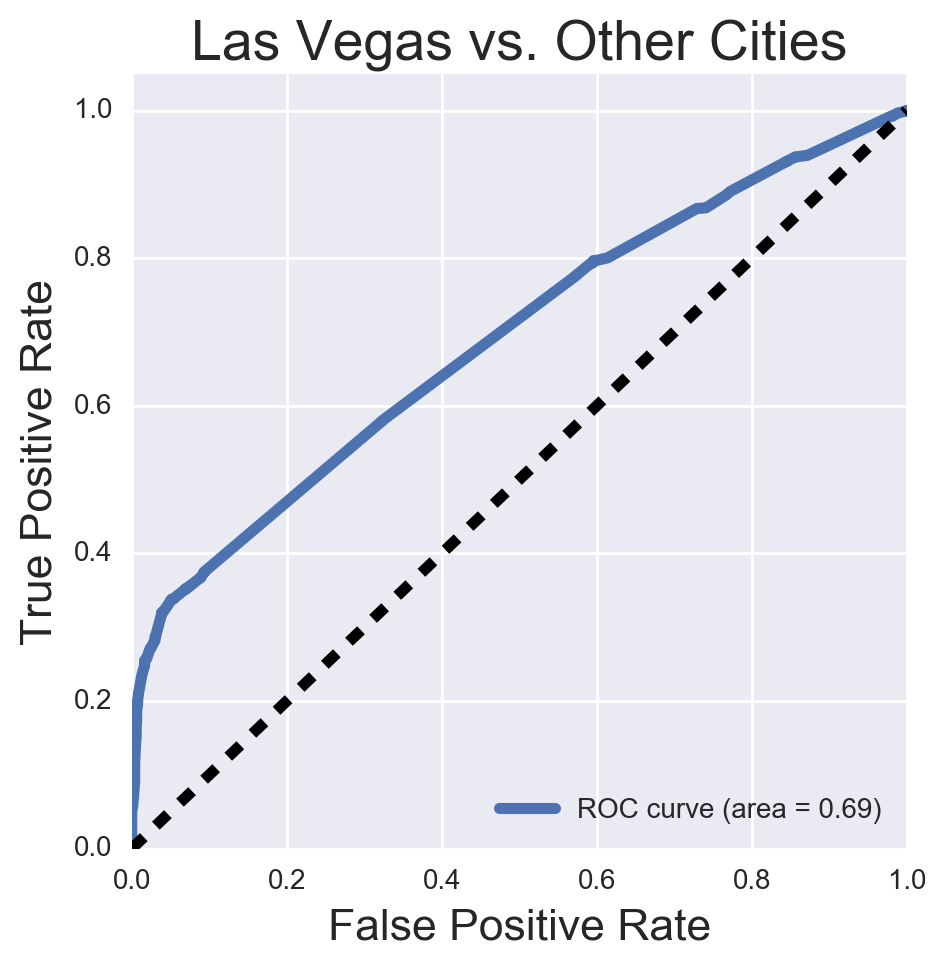

In [21]:
from sklearn.metrics import roc_curve, auc

Xc = X - X.mean()

lr_centered = LogisticRegression()
lr_centered.fit(Xc, y)

y_pp = lr_centered.predict_proba(Xc)

fpr, tpr, _ = roc_curve(y, y_pp[:, 1])
roc_auc = auc(fpr, tpr)

plt.figure(figsize=[5,5])
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc, linewidth=4)
plt.plot([0, 1], [0, 1], 'k--', linewidth=4)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.title('Las Vegas vs. Other Cities', fontsize=20)
plt.legend(loc="lower right")
plt.show()

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 3. Different categories of ratings

---

Yelp is finally ready to admit that their rating system sucks. No one cares about the ratings, they just use the site to find out what's nearby. The ratings are simply too unreliable for people. 

Yelp hypothesizes that this is, in fact, because different people tend to give their ratings based on different things. They believe that perhaps some people always base their ratings on quality of food, others on service, and perhaps other categories as well. 

1. Do some users tend to talk about service more than others in reviews/tips? Divide up the tips/reviews into more "service-focused" ones and those less concerned with service.
2. Create two new ratings for businesses: ratings from just the service-focused reviews and ratings from the non-service reviews.
3. Construct a regression model for each of the two ratings. They should use the same predictor variables (of your choice). 
4. Validate the performance of the models.
5. Do the models coefficients differ at all? What does this tell you about the hypothesis that there are in fact two different kinds of ratings?

In [27]:
#Going to merge the tips dataframe with the service dataframe on user_id.
tips_group = tips.groupby(['user_id']).mean()

In [28]:
tips_group = tips_group.reset_index()

In [30]:
tips_group.drop(['Unnamed: 0'], axis=1, inplace=True)

In [31]:
tips_group.head(2)

,user_id,likes,hours_24,amazing_food,animal_style,awesome_food,awesome_place,awesome_service,beef_hash,beer_selection,...,service_good,service_great,slow_service,staff_friendly,staff_great,steak_eggs,super_friendly,sweet_potato,velvet_pancakes,worth_wait
0,--2QZsyXGz1OhiD4-0FQLQ,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,--4fX3LBeXoE88gDTK6TKQ,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [34]:
reviews_group = reviews.groupby(['user_id']).mean()

In [35]:
reviews_group = reviews_group.reset_index()

In [36]:
reviews_group.drop(['Unnamed: 0'], axis=1, inplace=True)

In [37]:
reviews_group.head(2)

,user_id,votes_cool,votes_funny,stars,votes_useful,minutes_10,minutes_15,minutes_20,minutes_30,bar_food,...,service_great,staff_friendly,super_friendly,sweet_potato,tasted_like,time_vegas,try_place,ve_seen,ve_tried,wait_staff
0,-2PFmYGWB6rQhZtRh6PlPA,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,-2f_1tcTWDUNDk-_ZSC8Xg,0.0,0.0,3.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [38]:
#Merge the tables
service = pd.merge(reviews_group, tips_group, on = 'user_id', how = 'left')

In [39]:
#Using the filter regex allows me to return values based on character

service_df = service.filter(regex = 'service|staff|friendly|stars|elite')

In [40]:
column = service.columns - service_df.columns

/Users/aneelanand/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:1: FutureWarning: using '-' to provide set differences with Indexes is deprecated, use .difference()
  if __name__ == '__main__':


In [41]:
nonservice_df = service[column]

In [42]:
service_df = service_df.fillna(0)
nonservice_df = nonservice_df.fillna(0)

In [43]:
nonservice_df['stars'] = service_df['stars']

In [44]:
nonservice_df.columns = [x.strip().replace(' ', '_') for x in nonservice_df.columns]
nonservice_df.columns = [x.strip().replace('.', '_') for x in nonservice_df.columns]
service_df.columns = [x.strip().replace(' ', '_') for x in service_df.columns]

In [45]:
nonservice_df.shape, service_df.shape

((2393, 174), (2393, 33))

In [46]:
#Removing duplicate columns from the merged tables
dup = nonservice_df.filter(regex = '_y')
nonservice_df.drop(dup, axis=1, inplace=True)
dup2 = service_df.filter(regex = '_y')
service_df.drop(dup2, axis = 1, inplace=True)

In [47]:
service_df.head(2)

,stars,bottle_service_x,customer_service_x,food_service_x,friendly_staff_x,good_service_x,great_service_x,service_excellent,service_food_x,service_friendly,...,staff_friendly_x,super_friendly_x,wait_staff,awesome_service,excellent_service,fast_service,friendly_service,great_staff,slow_service,staff_great
0,4.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [48]:
nonservice_df.head(2)

,amazing_food,animal_style,awesome_food,awesome_place,bar_food,beef_hash,beer_selection_x,best_breakfast,best_burger,best_burgers,...,try_place,user_id,ve_seen,ve_tried,velvet_pancakes,votes_cool,votes_funny,votes_useful,worth_wait,stars
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,-2PFmYGWB6rQhZtRh6PlPA,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,-2f_1tcTWDUNDk-_ZSC8Xg,0.0,0.0,0.0,0.0,0.0,1.0,0.0,3.0


In [49]:
X = nonservice_df[['friday_night', 'recommend_place']]
y = nonservice_df['stars'].values
X2 = service_df[['service_good_x', 'service_friendly']]
y2 = service_df['stars'].values

In [50]:
#Test/train 60/40 splot
X_nonservice_train, X_nonservice_test, y_nonservice_train, y_nonservice_test = train_test_split(X, y,test_size=0.4)
X_service_train, X_service_test, y_service_train, y_service_test = train_test_split(X2, y2,test_size=0.4)

print(X_nonservice_train.shape, X_nonservice_test.shape, y_nonservice_train.shape, y_nonservice_test.shape)
print(X_service_train.shape, X_service_test.shape, y_service_train.shape, y_service_test.shape)

(1435, 2) (958, 2) (1435,) (958,)
(1435, 2) (958, 2) (1435,) (958,)


In [51]:
lm = LinearRegression() #Using linear regression since y is a continuous

model_nonservice = lm.fit(X, y)
model_service = lm.fit(X2,y2)
predictions_nonservice = lm.predict(X)
predictions_service = lm.predict(X2)

print("Mean of predictions for Nonservice & Service")
print(predictions_nonservice.mean())
print(predictions_service.mean())
print('--------------------------')

print("Score for Nonservice & Service")
print(model_nonservice.score(X, y))
print(model_service.score(X2, y2))
print('--------------------------')

print("Coefficient for Nonservice & Service")
print(model_nonservice.coef_)
print(model_service.coef_)
print('--------------------------')

print("Intercept")
print(lm.intercept_)

Mean of predictions for Nonservice & Service
2.33747386785
2.33999860705
--------------------------
Score for Nonservice & Service
-0.00274723272716
0.00248940252566
--------------------------
Coefficient for Nonservice & Service
[ 0.41869533  0.03554101]
[ 0.41869533  0.03554101]
--------------------------
Intercept
2.33381532876


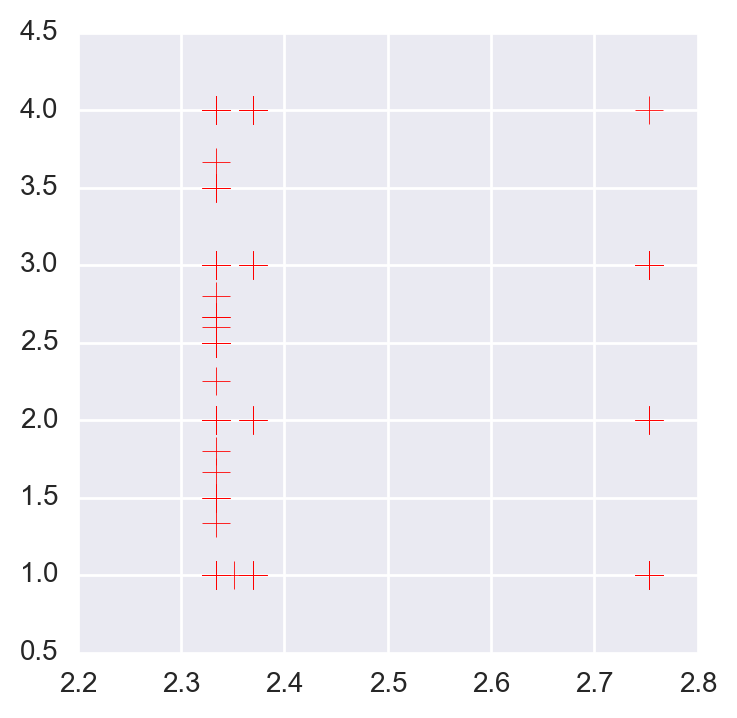

In [52]:
fig = plt.figure(figsize=(4,4))
plt.scatter(predictions_nonservice, y, s=100, c='r', marker='+')

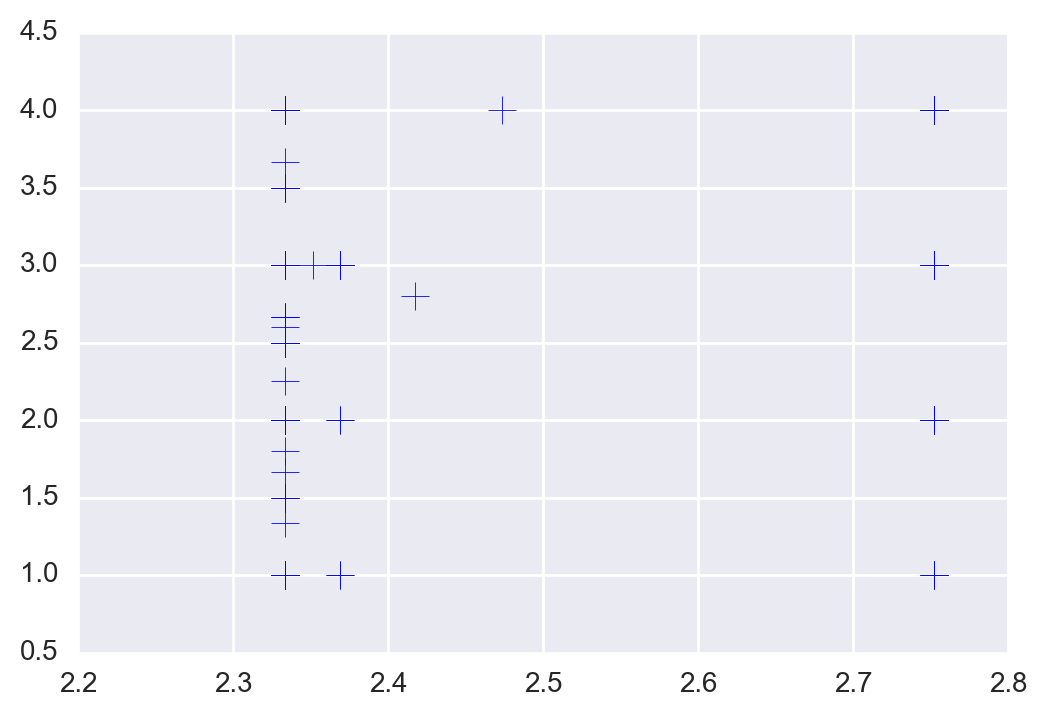

In [53]:
plt.scatter(predictions_service, y2, s=100, c='b', marker='+')

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 4. Identifying "elite" users

---

Yelp, though having their own formula for determining whether a user is elite or not, is interested in delving deeper into what differentiates an elite user from a normal user at a broader level.

Use a classification model to predict whether a user is elite or not. Note that users can be elite in some years and not in others.

1. What things predict well whether a user is elite or not?
- Validate the model.
- If you were to remove the "counts" metrics for users (reviews, votes, compliments), what distinguishes an elite user, if anything? Validate the model and compare it to the one with the count variables.
- Think of a way to visually represent your results in a compelling way.
- Give a brief write-up of your findings.


In [55]:
#Group reviews by user and remove unnecessary columns
reviews['Reviews'] = 1
cols = [col for col in reviews.columns if col not in ['business_id','review_id','date']]
reviews = reviews[cols]
grouped_r = reviews.groupby('user_id').sum().reset_index()

In [58]:
#Create target variable from elite years. If they were elite at all vs. if they were never elite.
users['target'] = users['elite'].map(lambda x: False if x == '[]' else True)
users['target'].value_counts()

False    127583
True      16623
Name: target, dtype: int64

In [59]:
#Fill in nulls with 0
users.fillna(value=0.,inplace=True)

In [60]:
#Merge reviews and users 
users_vf = users.merge(grouped_r,how='inner',left_on='user_id',right_on='user_id')

In [61]:
users_vf['target'].value_counts()

False    1734
True      659
Name: target, dtype: int64

In [62]:
#Set up target and predictors and normalize
y = users_vf['target']
X = users_vf[[col for col in users_vf.columns if col not in ['elite','name','user_id','target','yelping_since']]]

scale = StandardScaler()
Xn = scale.fit_transform(X)

print(Xn.shape,y.shape)

(2393, 124) (2393,)


In [63]:
#Train/Test split by 60:40
X_comp_train, X_comp_test, y_comp_train, y_comp_test = train_test_split(X, y, test_size=0.4)

In [64]:
lr_params = {
    'solver':['liblinear'],
    'penalty':['l1','l2'],
    'C':np.linspace(1, 5, 4)
}

eliteusers_gs = GridSearchCV(LogisticRegression(), lr_params, cv=10, verbose=1)

eliteusers_gs.fit(X_comp_train, y_comp_train)


Fitting 10 folds for each of 8 candidates, totalling 80 fits


[Parallel(n_jobs=1)]: Done  49 tasks       | elapsed:    3.0s
[Parallel(n_jobs=1)]: Done  80 out of  80 | elapsed:    8.9s finished


GridSearchCV(cv=10, error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'C': array([ 1.     ,  2.33333,  3.66667,  5.     ]), 'penalty': ['l1', 'l2'], 'solver': ['liblinear']},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=1)

In [65]:
eliteusers_lr = eliteusers_gs.best_estimator_
print("Params and Score for Elite Users")
print(eliteusers_gs.best_params_)
print (eliteusers_gs.best_score_,np.abs(0.5 - np.mean(y_comp_train)) + 0.5)
print('----------------------------------')

Params and Score for Elite Users
{'solver': 'liblinear', 'penalty': 'l1', 'C': 1.0}
0.891986062718 0.715679442509
----------------------------------


In [66]:
y = users_vf['target']
X = users_vf[[col for col in users_vf.columns if col not in ['elite','name','user_id','target','yelping_since',
                                                      'compliments.plain','review_count','compliments.cute',
                                                       'compliments.writer','compliments.note','compliments.hot',
                                                       'compliments.cool','compliments.profile','compliments.more',
                                                       'votes.cool_x','compliments.list','votes.funny_x',
                                                       'compliments.photos','compliments.funny','votes.useful_x',
                                                       'votes.cool_y','votes.funny_y','votes.useful_y']]]

scale = StandardScaler()
Xn = scale.fit_transform(X)

print(Xn.shape,y.shape)

(2393, 123) (2393,)


In [67]:
#Train/Test split by 60:40
X_ncomp_train, X_ncomp_test, y_ncomp_train, y_ncomp_test = train_test_split(X, y, test_size=0.4)

In [68]:
lr_params = {
    'solver':['liblinear'],
    'penalty':['l1','l2'],
    'C':np.linspace(1, 5, 4)
}

noneliteusers_gs = GridSearchCV(LogisticRegression(), lr_params, cv=10, verbose=1)

noneliteusers_gs.fit(X_ncomp_train, y_ncomp_train)

Fitting 10 folds for each of 8 candidates, totalling 80 fits


[Parallel(n_jobs=1)]: Done  49 tasks       | elapsed:    7.5s
[Parallel(n_jobs=1)]: Done  80 out of  80 | elapsed:   11.6s finished


GridSearchCV(cv=10, error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'C': array([ 1.     ,  2.33333,  3.66667,  5.     ]), 'penalty': ['l1', 'l2'], 'solver': ['liblinear']},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=1)

In [70]:
noneliteusers_lr = noneliteusers_gs.best_estimator_
print("Params and Score for Non-Elite Users")
print(noneliteusers_gs.best_params_)
print (noneliteusers_gs.best_score_,np.abs(0.5 - np.mean(y_ncomp_train)) + 0.5)
print('----------------------------------')

Params and Score for Non-Elite Users
{'solver': 'liblinear', 'penalty': 'l2', 'C': 3.6666666666666665}
0.901742160279 0.722648083624
----------------------------------


In [73]:
from sklearn.metrics import roc_curve, roc_auc_score, auc

def plot_roc(mod, X, y, varname):
    mod.fit(X, y)
    y_pp = mod.predict_proba(X)[:, 1]
    fpr_, tpr_, _ = roc_curve(y, y_pp)
    auc_ = auc(fpr_, tpr_)
    acc_ = np.abs(0.5 - np.mean(y)) + 0.5
    
    fig, axr = plt.subplots(figsize=(5,5))

    axr.plot(fpr_, tpr_, label='ROC (area = %0.2f)' % auc_,
             color='darkred', linewidth=4,
             alpha=0.7)
    axr.plot([0, 1], [0, 1], color='grey', ls='dashed',
             alpha=0.9, linewidth=4, label='baseline accuracy = %0.2f' % acc_)

    axr.set_xlim([-0.05, 1.05])
    axr.set_ylim([0.0, 1.05])
    axr.set_xlabel('false positive rate', fontsize=16)
    axr.set_ylabel('true positive rate', fontsize=16)
    axr.set_title(varname+' vs. not ROC curve\n', fontsize=20)

    axr.legend(loc="lower right", fontsize=12)

    plt.show()

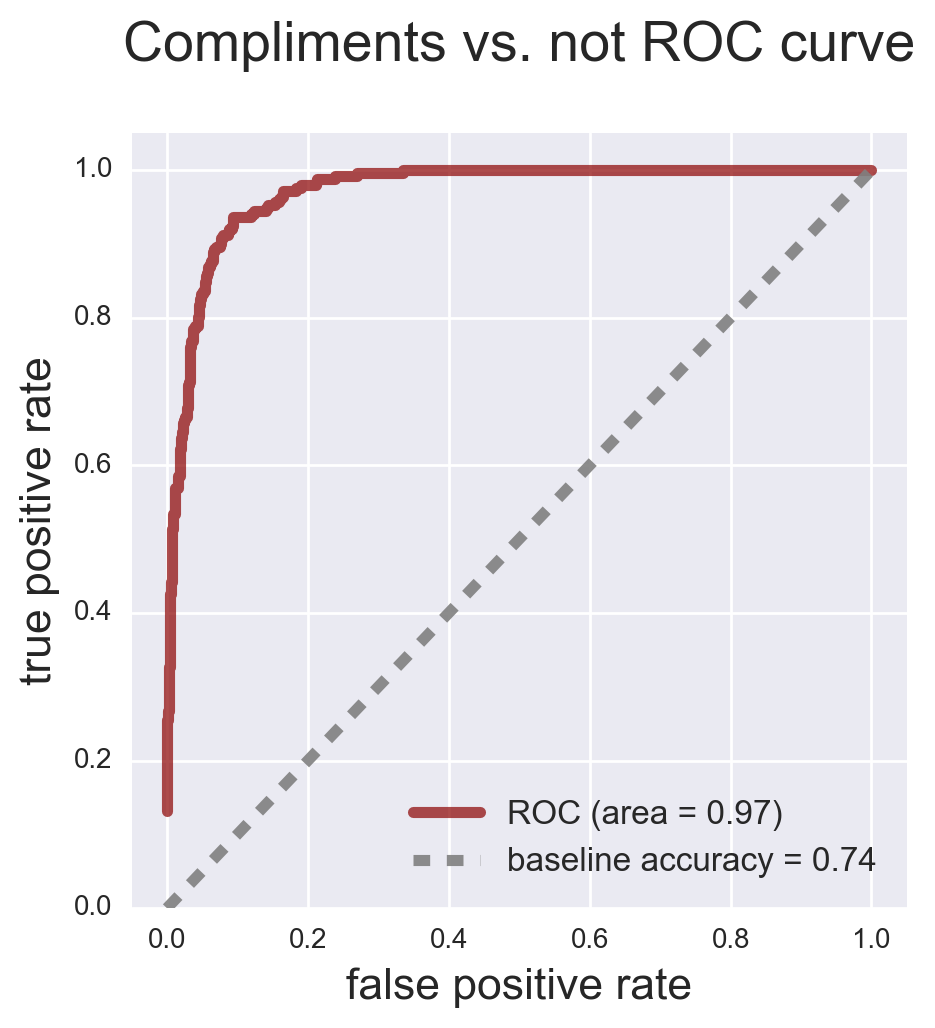

In [74]:
plot_roc(eliteusers_lr, X_comp_test, y_comp_test, 'Compliments')

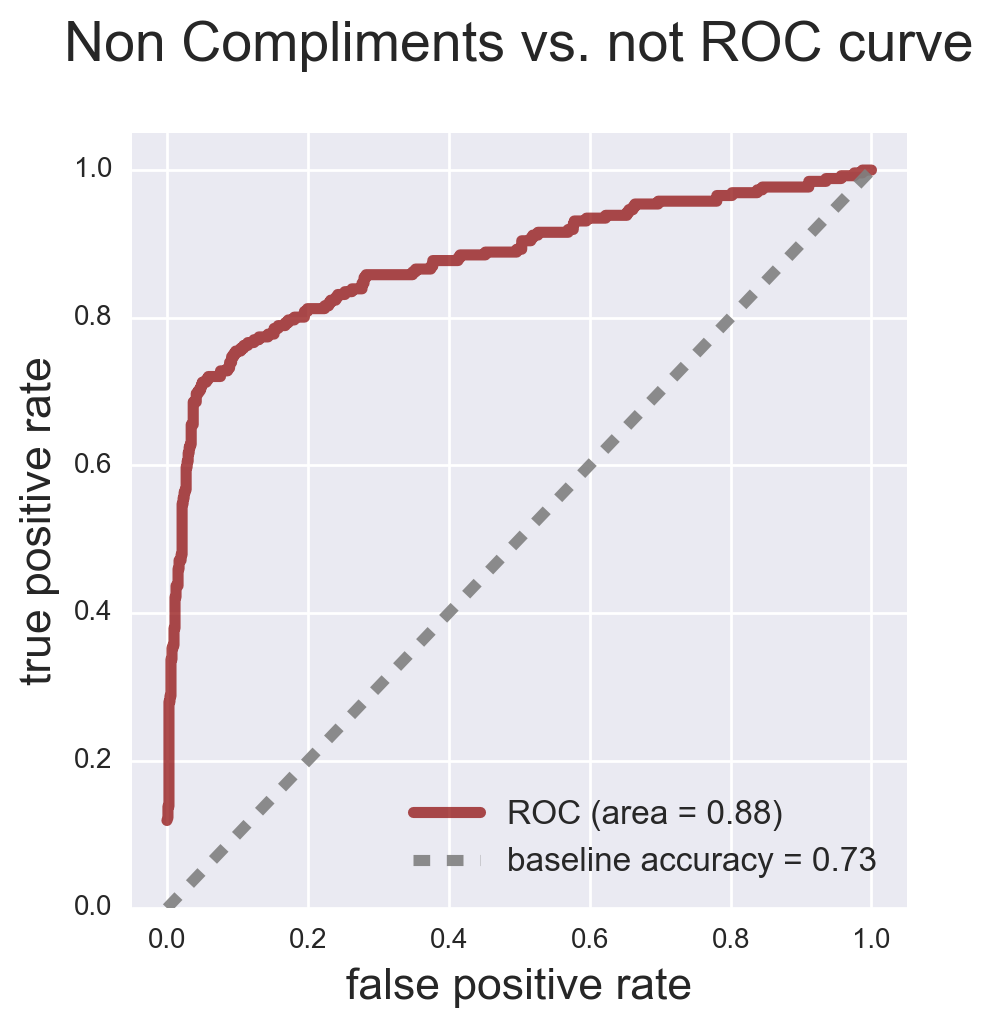

In [75]:
plot_roc(noneliteusers_lr, X_ncomp_test, y_ncomp_test, 'Non Compliments')

<img src="http://imgur.com/GCAf1UX.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 5. Find something interesting on your own

---

You want to impress your superiors at Yelp by doing some investigation into the data on your own. You want to do classification, but you're not sure on what.

1. Create a hypothesis or hypotheses about the data based on whatever you are interested in, as long as it is predicting a category of some kind (classification).
2. Explore the data visually (ideally related to this hypothesis).
3. Build one or more classification models to predict your target variable. **Your modeling should include gridsearching to find optimal model parameters.**
4. Evaluate the performance of your model. Explain why your model may have chosen those specific parameters during the gridsearch process.
5. Write up what the model tells you. Does it validate or invalidate your hypothesis? Write this up as if for a non-technical audience.

<img src="http://imgur.com/GCAf1UX.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 6. ROC and Precision-recall

---

Some categories have fewer overall businesses than others. Choose two categories of businesses to predict, one that makes your proportion of target classes as even as possible, and another that has very few businesses and thus makes the target varible imbalanced.

1. Create two classification models predicting these categories. Optimize the models and choose variables as you see fit.
- Make confusion matrices for your models. Describe the confusion matrices and explain what they tell you about your models' performance.
- Make ROC curves for both models. What do the ROC curves describe and what do they tell you about your model?
- Make Precision-Recall curves for the models. What do they describe? How do they compare to the ROC curves?
- Explain when Precision-Recall may be preferable to ROC. Is that the case in either of your models?